In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Clean_Dataset.csv') # Dataset from kaggle
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
# Drop unnecessary columns
# - **Unnamed: 0**: This column appears to be an artifact of indexing and can be safely removed.
# - **flight**: Since the flight numbers are specific identifiers and are not expected to influence the prediction, we will drop this column as well.
df = df.drop(columns=['Unnamed: 0', 'flight'])

In [5]:
# Checking for Missing Values
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


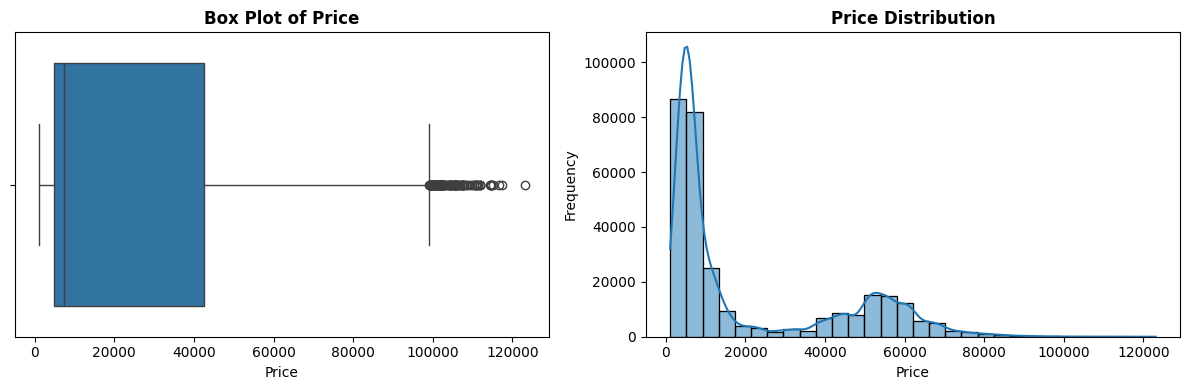

In [7]:

# Exploring the Distribution and Outliers of Prices

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot for the 'price' column 
box_plot = sns.boxplot(x=df['price'], ax=axes[0])
axes[0].set_title('Box Plot of Price', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price', fontsize=10)
axes[0].grid(False)

# Histogram for the 'price' column 
sns.histplot(df['price'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Price', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].grid(False)


plt.tight_layout()
plt.show()



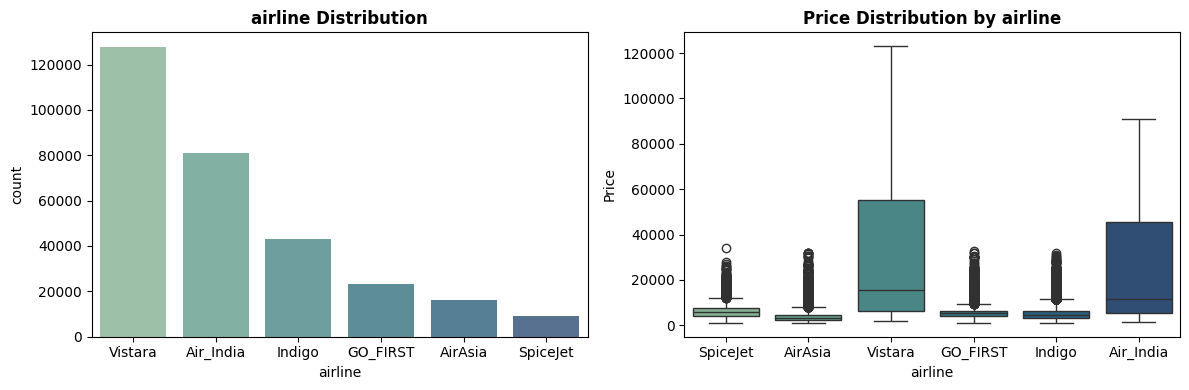

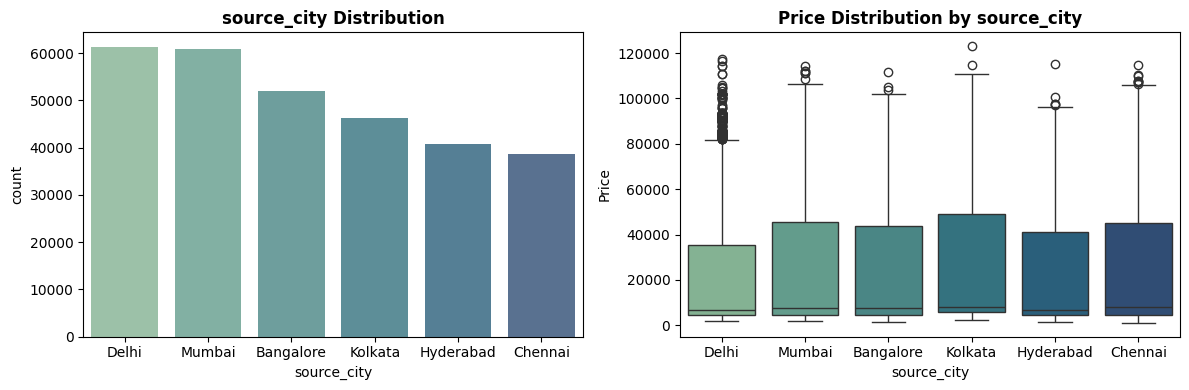

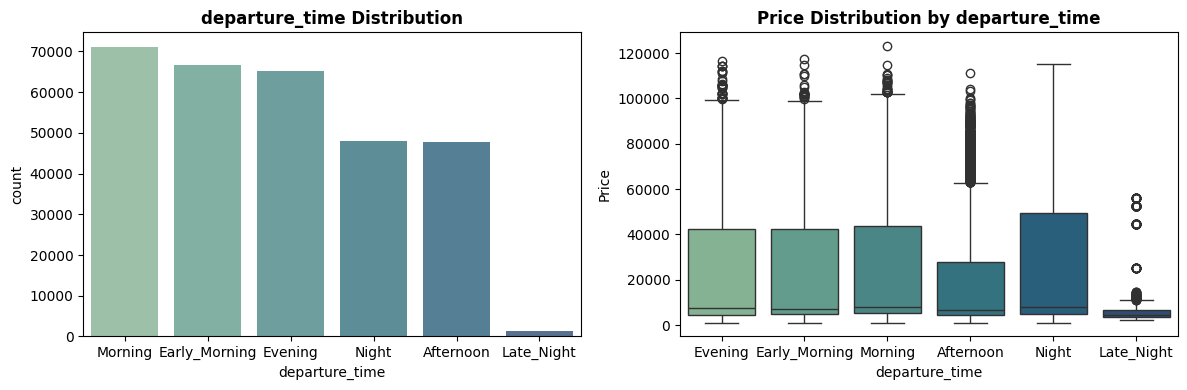

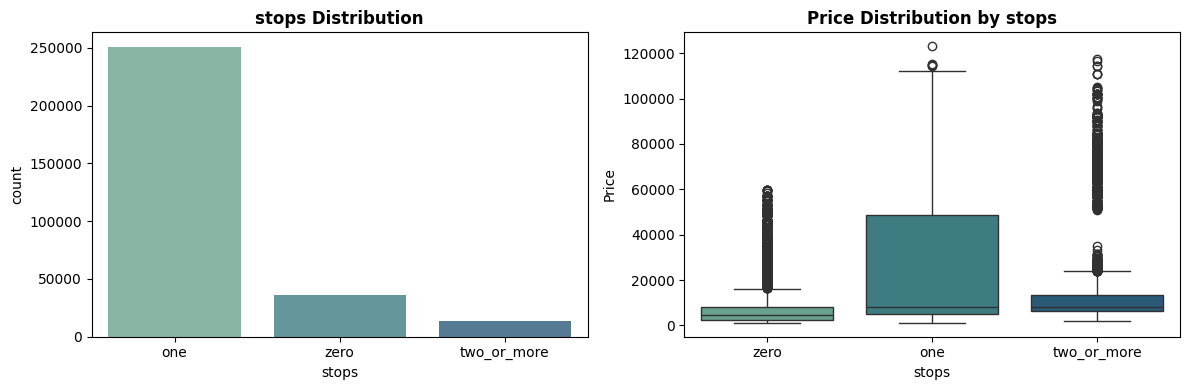

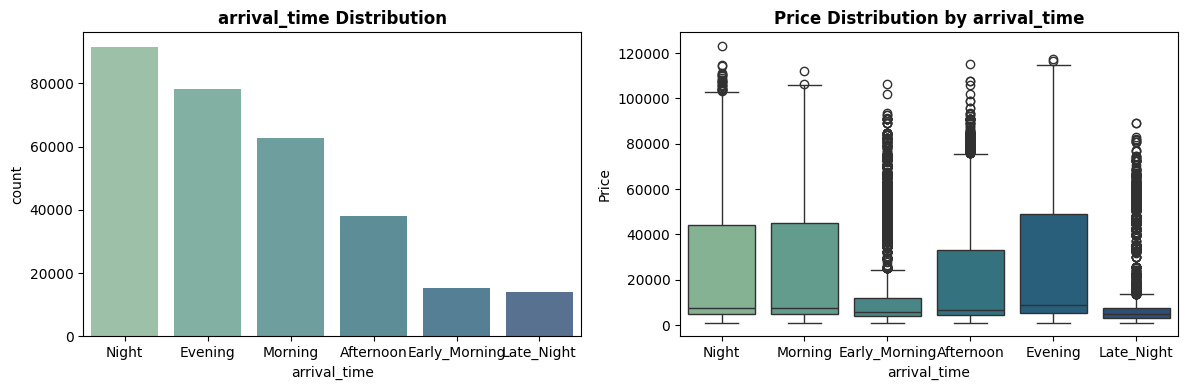

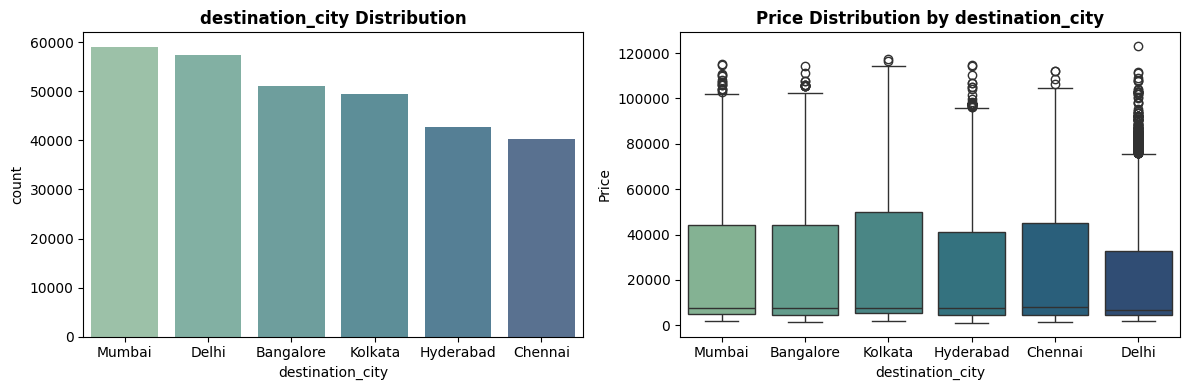

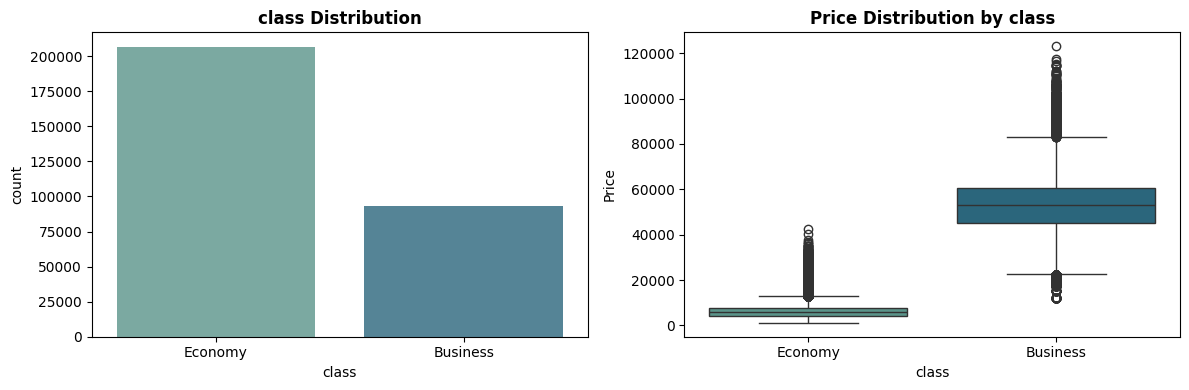

In [23]:
def plot_distributions(df, column):
    blue_palette = sns.color_palette("crest", n_colors=len(df[column].unique()))

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']

    # Plot the bar plot for value counts of the column
    sns.barplot(x=column, 
                y='count', 
                data=count_df,
                hue=column, 
                alpha=0.8, 
                palette=blue_palette, 
                ax=axes[0]),
    axes[0].set_title(f'{column} Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=10)
    axes[0].grid(False)

    # Plot the box plot for the column
    sns.boxplot(x=column, 
                y='price', 
                data=df, 
                hue=df[column],
                palette=blue_palette, 
                ax=axes[1])
    axes[1].set_title(f'Price Distribution by {column}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(column, fontsize=10)
    axes[1].set_ylabel('Price', fontsize=10)
    axes[1].grid(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# List of columns to plot
columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
           'destination_city', 'class']

# Generate plots for each column
for column in columns:
    plot_distributions(df, column)


In [47]:
df[['price', 'duration', 'days_left']].corr()

# Price vs. duration (0.204): There is a weak positive correlation; longer durations are slightly associated with higher prices.
# Price vs. days_left (-0.092): There is a very weak negative correlation; more days left are slightly associated with lower prices.
# Duration vs. days_left (-0.039): There is an extremely weak negative correlation; duration and days left have almost no linear relationship.

,price,duration,days_left
price,1.000000,0.204222,-0.091949
duration,0.204222,1.000000,-0.039157
days_left,-0.091949,-0.039157,1.000000
